# Instructions for the final project


Your final project must apply some of the Deep Learning techniques that you learned during this course.

**Deadline: November 20th**

## Done by yourself, in pairs or groups of 3 people

You can do your final project by yourself or you can team up with one or two other students. That is entirely up to you.

If you do your project along with other people, that should be made clear in the header of your Jupyter Notebook and every member of the group should submit the same notebook as their final project on Google Classroom.

## Code written and explained in a Jupyter Notebook

You should write and explain your code on a Jupyter Notebook written on Google Colab.

You must submit:
  * Your notebook
  * Your exported model, `export.pkl`, so I can test it.

## Example projects

You can pick one of the ideas below or you can come up with something different. If you think of something different, please consult me before you start working on your project.

Plase add a widget so I can test your model's predictions.

* Use the techniques described in [Chapter 2](https://colab.research.google.com/github/fastai/fastbook/blob/master/02_production.ipynb) to download your own data and create an image classifier. Of course, you should think of your own categories. Pick at least three categories. For example: apples, oranges, bananas and watermellons (you can't use these anymore). After you clean your data using the applets shown in [Chapter 2](https://colab.research.google.com/github/fastai/fastbook/blob/master/02_production.ipynb), try some of the techniques taught in [Chapter 5](https://colab.research.google.com/github/fastai/fastbook/blob/master/05_pet_breeds.ipynb) to improve your model's accuracy.
* Complete all the steps in [Chapter 4](https://colab.research.google.com/github/fastai/fastbook/blob/master/04_mnist_basics.ipynb) using the full MNIST datasets (that is, for all digits, not just 3s and 7s). This is a significant project and will take you quite a bit of time to complete! You'll need to do some of your own research to figure out how to overcome some obstacles you'll meet on the way. 
* Retrain the bear classifier from [Chapter 2](https://colab.research.google.com/github/fastai/fastbook/blob/master/02_production.ipynb) using multi-label classification. See if you can make it work effectively with images that don't contain any bears, including showing that information in the web application. Try an image with two different kinds of bears. Check whether the accuracy on the single-label dataset is impacted using multi-label classification.

In [ ]:
!pip install fastbook
!pip install -q jmd_imagescraper
from fastbook import *
from fastai.vision.widgets import *
from fastai.vision.all import *
import os
os.mkdir('images')

from pathlib import Path
path = Path().cwd()/'comidas'
from jmd_imagescraper.core import *
duckduckgo_search(path,"pasta gabinete", "gabinete", max_results=100)
duckduckgo_search(path,"pasta mouse", "mouse", max_results=100)
duckduckgo_search(path,"pasta teclado", "teclado", max_results=100)
from jmd_imagescraper.imagecleaner import *

     |████████████████████████████████| 727kB 8.6MB/s 
     |████████████████████████████████| 1.2MB 15.5MB/s 
     |████████████████████████████████| 51kB 8.2MB/s 
     |████████████████████████████████| 194kB 34.0MB/s 
     |████████████████████████████████| 51kB 7.6MB/s 
     |████████████████████████████████| 61kB 8.1MB/s 
     |████████████████████████████████| 12.8MB 222kB/s 
     |████████████████████████████████| 776.8MB 24kB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
  Found existing installation: torchvision 0.9.1+cu101
    Uninstalling torchvision-0.9.1+cu101:
      Successfully uninstalled torchvision-0.9.1+cu101
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61
Duckduckgo search: gabinete


Duckduckgo search: mouse


Duckduckgo search: teclado


In [ ]:
display_image_cleaner(path)

HTML(value='<h2>No images left to display in this folder.</h2>', layout=Layout(visibility='hidden'))

GridBox(children=(VBox(children=(Image(value=b'', layout="Layout(width='150px')"), Button(description='Delete'…

In [ ]:
tipos_comida = 'bolo','pizza','uva'

comidas = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
dls = comidas.dataloaders(path)

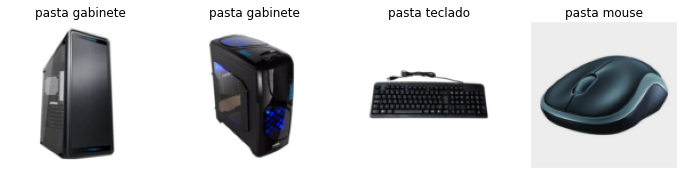

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

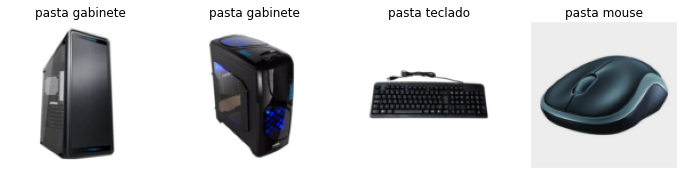

In [ ]:
comidas = comidas.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = comidas.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

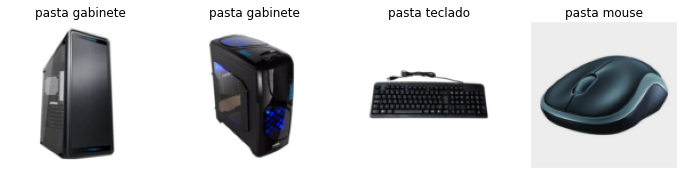

In [ ]:
comidas = comidas.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = comidas.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

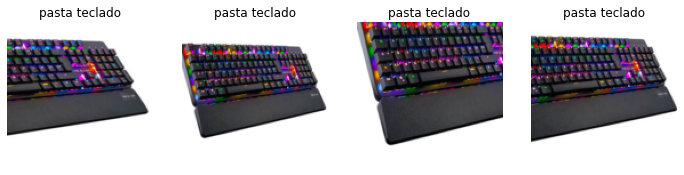

In [ ]:
comidas = comidas.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = comidas.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [ ]:
comidas = comidas.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = comidas.dataloaders(path)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.641543,0.959317,0.383333,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.509718,0.187797,0.050000,00:02
1,0.355617,0.007989,0.000000,00:02
2,0.273054,0.001173,0.000000,00:02
3,0.218189,0.000999,0.000000,00:02


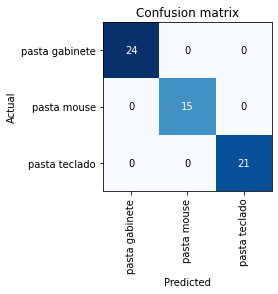

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

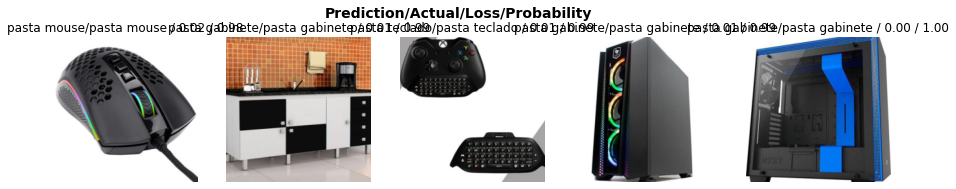

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
learn.fine_tune??

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.659085,0.453536,0.150000,00:02
1,0.885011,0.023293,0.016667,00:02
2,0.582295,0.004728,0.000000,00:02


In [ ]:
learn.unfreeze()

SuggestedLRs(lr_min=4.786300996784121e-05, lr_steep=7.585775847473997e-07)

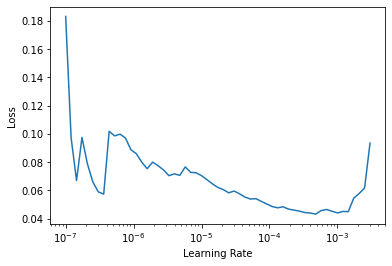

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(6, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.110250,0.007044,0.000000,00:02
1,0.065697,0.008016,0.000000,00:02
2,0.053134,0.005266,0.000000,00:02
3,0.044343,0.003816,0.000000,00:02
4,0.036751,0.004053,0.000000,00:02
5,0.045094,0.002997,0.000000,00:02


In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.653275,0.519328,0.166667,00:02
1,0.847180,0.052203,0.016667,00:02
2,0.559383,0.001272,0.000000,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.041382,0.000231,0.000000,00:02
1,0.054622,0.000156,0.000000,00:02
2,0.041142,0.000157,0.000000,00:02
3,0.041577,0.000168,0.000000,00:02
4,0.039011,0.000198,0.000000,00:02
5,0.044568,0.000191,0.000000,00:02
6,0.041094,0.000209,0.000000,00:02
7,0.042415,0.000257,0.000000,00:02
8,0.037138,0.000269,0.000000,00:02
9,0.034497,0.000328,0.000000,00:02


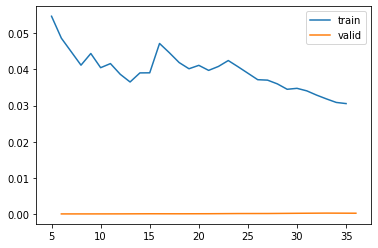

In [ ]:
learn.recorder.plot_loss()

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
#learn_inf.predict('images/.jpg')

In [ ]:
learn_inf.dls.vocab

['pasta gabinete', 'pasta mouse', 'pasta teclado']

In [ ]:
#PARA RODAR UM BOTAO DE UPLOAD

btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(btn_upload.data[-1])

In [ ]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)

In [ ]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: pasta teclado; Probability: 0.9998')

In [ ]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
btn_upload = widgets.FileUpload()

In [ ]:
VBox([widgets.Label(''), 
      btn_upload, btn_run, out_pl, lbl_pred])